<a href="https://colab.research.google.com/github/tiagopessoalima/ED2/blob/main/Aula_Semana_03_(ED2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Quick Sort](https://www.youtube.com/watch?v=3San3uKKHgg)**

Sua estratégia consiste em selecionar um elemento da lista, conhecido como pivô. Em seguida, reorganiza a lista ao redor desse pivô, um processo chamado particionamento. O objetivo é posicionar todos os elementos menores que o pivô à sua esquerda e todos os elementos maiores à sua direita. Uma vez concluído o particionamento, o pivô já ocupa sua posição final correta na lista ordenada. O Quicksort então aplica recursivamente o mesmo procedimento às sub-listas formadas à esquerda e à direita do pivô, até que toda a lista esteja ordenada. Considere uma lista de exemplo com 9 elementos, onde o primeiro elemento é 54. Neste caso, o 54 funcionaria como o pivô inicial.



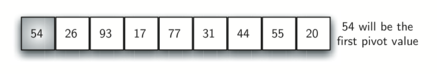

Para iniciar o particionamento, definimos dois marcadores: um *leftmark* (marca esquerda) e um *rightmark* (marca direita). O *leftmark* começa no início da porção da lista a ser analisada (logo após o pivô, se ele for o primeiro elemento), e o *rightmark* começa no final dessa porção. O objetivo é reposicionar os itens que estão do lado "incorreto" da lista em relação ao valor do pivô. Isso é feito movendo os marcadores um em direção ao outro, identificando e trocando elementos que estão fora de lugar, até que os marcadores se cruzem. Esse avanço convergente em direção ao ponto de divisão é o que organiza a seção da lista, como ilustrado na figura a seguir.

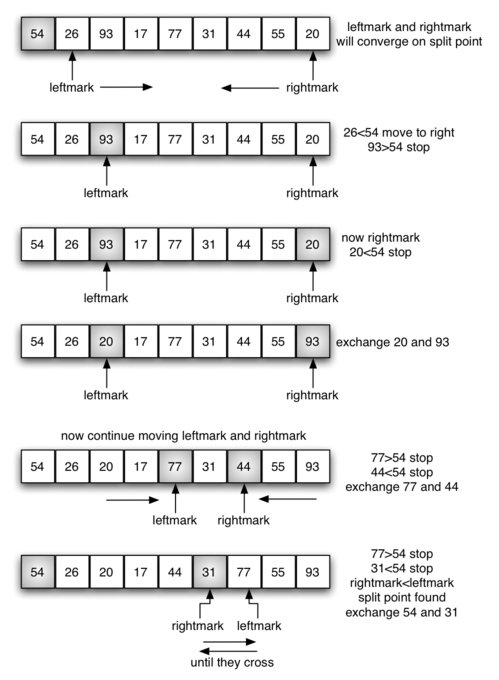

O algoritmo opera da seguinte maneira: *leftmark* é incrementado até apontar para um valor maior ou igual ao valor do pivô. Então, *rightmark* é decrementado até encontrar um valor menor ou igual ao do pivô. Se, após esses movimentos, `leftmark < rightmark`, isso indica que encontramos dois elementos que estão "do lado errado" em relação à futura posição do pivô. No exemplo, isso ocorre quando *leftmark* aponta para 93 e *rightmark* para 20. Neste ponto, realizamos a troca desses dois valores (93 e 20) e o processo de busca (mover *leftmark* e *rightmark*) recomeça. Este ciclo continua até que o *rightmark* cruze ou se iguale ao *leftmark* (`rightmark <= leftmark`). Esse cruzamento sinaliza que o ponto de divisão foi encontrado. Neste momento, trocamos o valor original do pivô (que estava no início da seção) com o valor na posição *rightmark*. Essa troca posiciona o pivô em seu lugar definitivo na lista ordenada. Com o pivô em sua posição final, a lista está efetivamente dividida. Agora, o algoritmo Quicksort é invocado recursivamente sobre as duas sub-listas resultantes: a sub-lista à esquerda do pivô e a sub-lista à sua direita. Esse processo recursivo continua até que todas as sub-listas contenham apenas um elemento ou estejam vazias, ponto em que a lista inteira estará ordenada, conforme ilustra a figura abaixo.


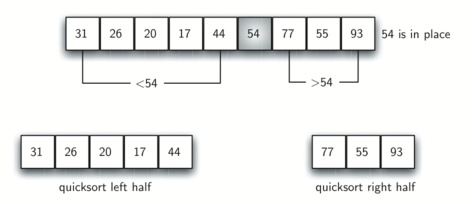

## **Implementação**

### **Função particionar**

A função particionar é usada para reorganizar uma lista em torno de um pivô. Ela posiciona os menores valores à esquerda e os maiores à direita, trocando elementos conforme necessário. No final, o pivô é colocado em sua posição correta, e a função retorna seu índice.



In [2]:
def particionar(lista, inicio, fim):
    pivo = lista[inicio]
    esquerda = inicio + 1
    direita = fim

    while True:
        while esquerda <= direita and lista[esquerda] <= pivo:  # Move esquerda até encontrar um valor maior que o pivô
            esquerda += 1

        while lista[direita] >= pivo and direita >= esquerda:  # Move direita até encontrar um valor menor que o pivô
            direita -= 1

        if esquerda < direita:  # Troca elementos fora de ordem
            lista[esquerda], lista[direita] = lista[direita], lista[esquerda]
        else:
            break  # Encerra quando os ponteiros se cruzam

    lista[inicio], lista[direita] = lista[direita], lista[inicio]  # Coloca o pivô na posição correta
    return direita  # Retorna o índice do pivô

**Explicação**

1. **Definição do Pivô**  
   - O primeiro elemento da lista (`lista[inicio]`) é escolhido como pivô.  
   - Dois ponteiros são definidos:  
     - `esquerda`, iniciando logo após o pivô.  
     - `direita`, iniciando no final da lista.  

2. **Movimentação dos Ponteiros**  
   - O ponteiro `esquerda` avança enquanto encontrar elementos **menores ou iguais** ao pivô.  
   - O ponteiro `direita` recua enquanto encontrar elementos **maiores ou iguais** ao pivô.  

3. **Troca de Elementos Fora de Ordem**  
   - Se `esquerda < direita`,  há um elemento maior que o pivô na esquerda e um menor na direita, então eles são trocados.  
   - Se `esquerda >= direita`, os ponteiros se cruzaram e o loop termina.  

4. **Posicionamento Final do Pivô**  
   - O pivô é trocado com o elemento em `direita`, garantindo que todos os menores estejam à esquerda e os maiores à direita.  

5. **Retorno do Índice do Pivô**  
   - A função retorna `direita`, que é a posição correta do pivô na lista.

### **Função quick_sort**

A função aplica a estratégia recursiva do algoritmo. Ela ordena uma lista (ou sublista delimitada por `inicio` e `fim`) dividindo-a em duas partes menores usando a função `particionar`. Em seguida, chama a si mesma recursivamente para ordenar essas duas sub-listas (à esquerda e à direita do pivô), repetindo o processo até que toda a lista esteja ordenada.

In [3]:
def quick_sort(lista, inicio=0, fim=None):
    if fim is None:  # Define 'fim' como o último índice da lista, se não for fornecido
        fim = len(lista) - 1

    if inicio < fim:  # Garante que há pelo menos dois elementos para ordenar
        indice_pivo = particionar(lista, inicio, fim)  # Particiona a lista e obtém a posição final do pivô

        quick_sort(lista, inicio, indice_pivo - 1)  # Ordena a sub-lista à esquerda do pivô
        quick_sort(lista, indice_pivo + 1, fim)  # Ordena a sub-lista à direita do pivô

**Explicação**  

**1. Definição dos Limites da Lista**  
- A função `quick_sort` recebe a lista e os índices `inicio` e `fim`, que definem a parte da lista a ser ordenada.  
- Se `fim` não for especificado, ele é definido como o último índice da lista (`len(lista) - 1`).  

**2. Verificação da Condição de Parada**  
- Se `inicio < fim`, significa que ainda há mais de um elemento para ordenar, então o algoritmo continua.  
- Caso contrário, a função retorna sem fazer nada.  

**3. Particionamento da Lista**  
- A função `particionar(lista, inicio, fim)` é chamada para reorganizar os elementos.  
- O **pivô** é escolhido e colocado na posição correta, garantindo que:  
  - Elementos **menores** que o pivô fiquem à esquerda.  
  - Elementos **maiores** que o pivô fiquem à direita.  
- O índice final do pivô é armazenado na variável `indice_pivo`.  

**4. Chamada Recursiva para as Sub-listas**  
- **Ordenação da parte esquerda**:  
  - `quick_sort(lista, inicio, indice_pivo - 1)`: Ordena os elementos antes do pivô.  
- **Ordenação da parte direita**:  
  - `quick_sort(lista, indice_pivo + 1, fim)`: Ordena os elementos após o pivô.  

**5. Repetição do Processo**  
- A função `quick_sort` é chamada recursivamente até que todas as sub-listas tenham **zero ou um elemento**.  
- Quando isso acontece, a lista estará completamente ordenada.

### **Exemplo de Uso**

In [8]:
numeros = [64, 34, 25, 12, 22, 11, 90]
quick_sort(numeros)
print(numeros)

[11, 12, 22, 25, 34, 64, 90]


## **Análise de Complexidade**

### **Tempo de Execução**

A análise do tempo de execução do QuickSort depende de dois processos principais:

1. **Particionamento:** Escolhe um pivô e reorganiza os elementos da lista de forma que os menores fiquem à esquerda e os maiores à direita. Isso ocorre em $O(n)$ para uma lista de tamanho $n$.
2. **Recursão:** Após o particionamento, o algoritmo é aplicado recursivamente às sublistas à esquerda e à direita do pivô.

A complexidade também varia conforme a escolha do pivô e a disposição inicial dos elementos. Vamos analisar os principais casos:

**Melhor Caso**

No melhor caso, o pivô divide a lista em duas partes aproximadamente iguais a cada passo. Isso resulta em:

- **Divisão:** Ocorre em $O(\log n)$ passos, pois a lista é dividida ao meio em cada nível de recursão.
- **Particionamento:** Em cada nível, processamos $n$ elementos no total, resultando em $O(n \log n)$.

A complexidade total é: $O(n \log n)$.

**Pior Caso**

No pior caso (por exemplo, quando a lista já está ordenada e o pivô é sempre o menor ou maior elemento), o particionamento resulta em uma sublista com $n-1$ elementos e outra com $0$. Isso leva a:

- Divisão: Ocorre em $O(n)$ passos, pois a recursão é linear.
- Particionamento: Em cada nível, processamos aproximadamente $n$ elementos, resultando em $O(n^2)$.

A complexidade total é: $O(n^2)$.

**Caso Médio**

No caso médio, o pivô divide a lista em proporções equilibradas. A análise probabilística mostra que o tempo esperado é: $O(n \log n)$

#### **Detalhamento das Etapas**

Para entender a complexidade, analisamos as duas etapas principais:

#### **Particionamento**